### 🚗 Car Price Prediction using AutoGluon

In [4]:

import pandas as pd
from autogluon.tabular import TabularPredictor

In [5]:
# --- 2. Load the Dataset ---
df = pd.read_csv('car_price_dataset.csv')
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (10000, 10)


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [6]:
# --- 3. Exploratory Data Analysis (EDA) ---
print("\nColumns:")
print(df.columns.tolist())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nData Types:")
print(df.dtypes)

print("\nStatistical Summary:")
print(df.describe())



Columns:
['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission', 'Mileage', 'Doors', 'Owner_Count', 'Price']

Missing Values:
Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

Data Types:
Brand            object
Model            object
Year              int64
Engine_Size     float64
Fuel_Type        object
Transmission     object
Mileage           int64
Doors             int64
Owner_Count       int64
Price             int64
dtype: object

Statistical Summary:
               Year   Engine_Size        Mileage         Doors   Owner_Count  \
count  10000.000000  10000.000000   10000.000000  10000.000000  10000.000000   
mean    2011.543700      3.000560  149239.111800      3.497100      2.991100   
std        6.897699      1.149324   86322.348957      1.110097      1.422682   
min     2000.000000      1.000000      25.000000      2.

In [7]:
# --- 4. Define Target Column ---
TARGET = 'Price'
df = df.dropna(subset=[TARGET])

In [8]:
# --- 5. Train/Test Split ---
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
print(f"Train Shape: {train_data.shape}, Test Shape: {test_data.shape}")

Train Shape: (8000, 10), Test Shape: (2000, 10)


In [9]:
# --- 6. Train AutoGluon Regressor ---
predictor = TabularPredictor(label=TARGET, problem_type='regression', eval_metric='r2')
predictor.fit(train_data=train_data, time_limit=600)

No path specified. Models will be saved in: "AutogluonModels\ag-20250415_223659"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.11.11
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          22
Memory Avail:       15.63 GB / 31.43 GB (49.7%)
Disk Space Avail:   229.45 GB / 401.65 GB (57.1%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'       

[1000]	valid_set's l2: 16442.4	valid_set's r2: 0.998357
[2000]	valid_set's l2: 14447.6	valid_set's r2: 0.998556
[3000]	valid_set's l2: 13975.6	valid_set's r2: 0.998603
[4000]	valid_set's l2: 13776.5	valid_set's r2: 0.998623
[5000]	valid_set's l2: 13611.6	valid_set's r2: 0.99864
[6000]	valid_set's l2: 13578.2	valid_set's r2: 0.998643
[7000]	valid_set's l2: 13547.8	valid_set's r2: 0.998646
[8000]	valid_set's l2: 13538.2	valid_set's r2: 0.998647
[9000]	valid_set's l2: 13520.2	valid_set's r2: 0.998649
[10000]	valid_set's l2: 13499.8	valid_set's r2: 0.998651


	0.9987	 = Validation score   (r2)
	74.8s	 = Training   runtime
	0.31s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 516.44s of the 516.43s of remaining time.


[1000]	valid_set's l2: 18589.6	valid_set's r2: 0.998142
[2000]	valid_set's l2: 17619.9	valid_set's r2: 0.998239
[3000]	valid_set's l2: 17237.6	valid_set's r2: 0.998277
[4000]	valid_set's l2: 17142.4	valid_set's r2: 0.998287
[5000]	valid_set's l2: 17082.3	valid_set's r2: 0.998293
[6000]	valid_set's l2: 17035.6	valid_set's r2: 0.998297
[7000]	valid_set's l2: 17027.5	valid_set's r2: 0.998298
[8000]	valid_set's l2: 17010.4	valid_set's r2: 0.9983
[9000]	valid_set's l2: 17001.8	valid_set's r2: 0.998301
[10000]	valid_set's l2: 16994.6	valid_set's r2: 0.998302


	0.9983	 = Validation score   (r2)
	75.49s	 = Training   runtime
	0.37s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 439.04s of the 439.04s of remaining time.
	0.9749	 = Validation score   (r2)
	3.31s	 = Training   runtime
	0.26s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 434.95s of the 434.95s of remaining time.
	Ran out of time, early stopping on iteration 2812.
	0.9998	 = Validation score   (r2)
	434.94s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the -0.17s of remaining time.
	Ensemble Weights: {'CatBoost': 0.923, 'LightGBMXT': 0.077}
	0.9998	 = Validation score   (r2)
	0.1s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 600.35s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 2447.5 rows/s (800 batch size)
TabularPredictor saved. To load, use: predictor = TabularPr

In [10]:
# --- 7. Leaderboard ---
predictor.leaderboard(test_data, silent=True)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.999844,0.999839,r2,1.133322,0.326861,509.835944,0.028538,0.002004,0.099748,2,True,7
1,CatBoost,0.999840,0.999835,r2,0.134674,0.014555,434.939358,0.134674,0.014555,434.939358,1,True,6
2,LightGBMXT,0.998634,0.998651,r2,0.970111,0.310301,74.796838,0.970111,0.310301,74.796838,1,True,3
3,LightGBM,0.998475,0.998302,r2,0.772120,0.366316,75.490598,0.772120,0.366316,75.490598,1,True,4
4,RandomForestMSE,0.973286,0.974939,r2,0.652408,0.256001,3.307830,0.652408,0.256001,3.307830,1,True,5
5,KNeighborsUnif,0.161045,0.128812,r2,0.064171,0.057312,6.259716,0.064171,0.057312,6.259716,1,True,1
6,KNeighborsDist,0.150975,0.129102,r2,0.064200,0.046036,0.022993,0.064200,0.046036,0.022993,1,True,2


In [11]:
# --- 8. Evaluate Model ---
performance = predictor.evaluate(test_data)

In [12]:
# --- 9. Predictions ---
y_pred = predictor.predict(test_data.drop(columns=[TARGET]))
comparison_df = pd.DataFrame({
    'Actual Price': test_data[TARGET],
    'Predicted Price': y_pred
})
print(comparison_df.head())

      Actual Price  Predicted Price
6252          2000      1959.771729
4684         11164     11164.152344
1731         14630     14594.944336
4742          7334      7347.387695
4521         10127     10141.990234


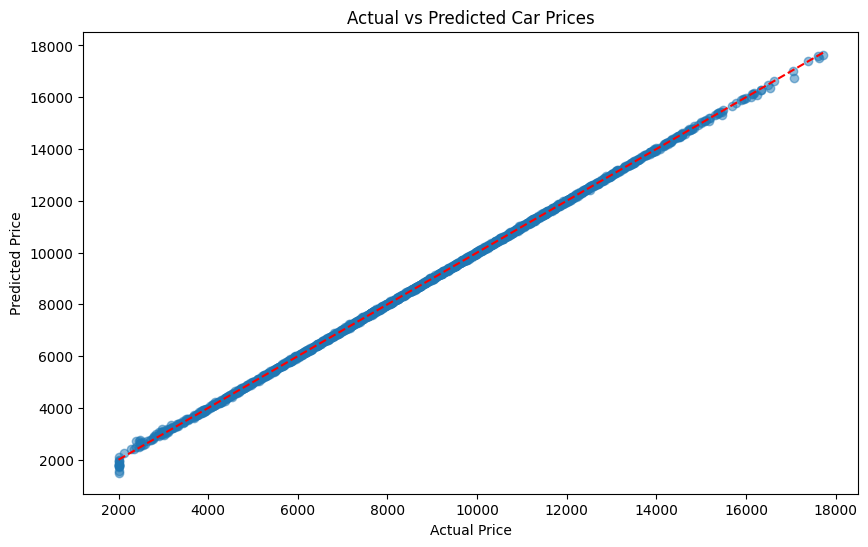

In [13]:
# --- 10. Plot Actual vs Predicted ---
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(test_data[TARGET], y_pred, alpha=0.5)
plt.plot([test_data[TARGET].min(), test_data[TARGET].max()],
         [test_data[TARGET].min(), test_data[TARGET].max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.show()

In [14]:
# --- 11. Save the Model ---
print(f"Model saved at: {predictor.path}")

Model saved at: C:\Users\Mudit\Downloads\anaconda\Data\AutogluonModels\ag-20250415_223659
